# Projekt MSP1

__Autor:__

David Chocholatý, xchoch09

## Úloha 1 - Bayesovské odhady

### a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení

- počet připojení za 1 ms popsaný 𝑋~𝑃𝑜(𝜆)
- expertní odhad: každých 5 ms by mělo nastat 10 připojení
- máme pozorování za dobu 100 ms


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import numpy as np

In [2]:
df_1 = pd.read_excel(open('Projekt-2_Data.xlsx', 'rb'), sheet_name='Úloha 1')
df_1

,uloha_1 a),uloha_1 b)_prior,skupina,uloha_1 b)_pozorování
0,2.0,3.634785,0,3.626656
1,2.0,2.868113,0,3.008269
2,1.0,2.149160,0,2.989829
3,3.0,4.263065,0,2.371630
4,0.0,2.594745,0,4.009366
...,...,...,...,...
99995,NaN,1.725637,9999,NaN
99996,NaN,4.048414,9999,NaN
99997,NaN,3.000662,9999,NaN
99998,NaN,3.058451,9999,NaN


In [3]:
OBSERVATIONS_COUNT = 100

observations = df_1['uloha_1 a)'][:OBSERVATIONS_COUNT]
observations = observations.astype('int64')
observations

0     2
1     2
2     1
3     3
4     0
     ..
95    3
96    0
97    3
98    1
99    1
Name: uloha_1 a), Length: 100, dtype: int64

#### Konjugované apriorní a aposteriorní rozdělení (expertní informace)

apriorní:
-----------
alfa: 10
beta: 5
aposteriorní:
-----------
alfa: 176
beta: 105


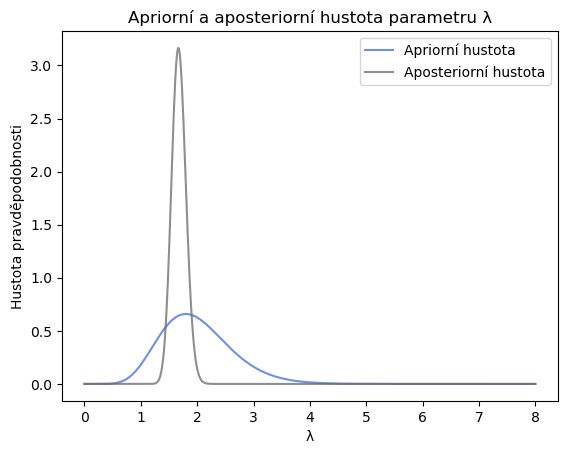

In [4]:
alpha_prior = 10
beta_prior = 5

alpha_posterior = alpha_prior + sum(observations)
beta_posterior = beta_prior + len(observations)

print('apriorní:')
print('-----------')
print('alfa: ' + str(alpha_prior))
print('beta: ' + str(beta_prior))
print('aposteriorní:')
print('-----------')
print('alfa: ' + str(alpha_posterior))
print('beta: ' + str(beta_posterior))

x = np.linspace(0, 8, 1000)

pdf_prior = stats.gamma.pdf(x, alpha_prior, scale=1/beta_prior)
pdf_posterior = stats.gamma.pdf(x, alpha_posterior, scale=1/beta_posterior)

fig, ax = plt.subplots(1, 1)
plt.title('Apriorní a aposteriorní hustota parametru λ')
ax.plot(x, pdf_prior, color='royalblue', label='Apriorní hustota', alpha=0.75)
ax.plot(x, pdf_posterior, color='dimgray', label='Aposteriorní hustota', alpha=0.75)
ax.legend(loc='best')
plt.xlabel('λ')
plt.ylabel('Hustota pravděpodobnosti')
plt.show()

#### Prediktivní rozdělení (pozorování)

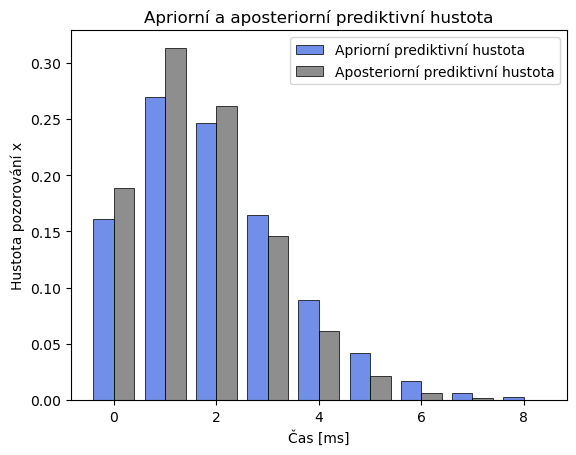

In [5]:
x = np.arange(0, 9)

pmf_prior = stats.nbinom.pmf(x, alpha_prior, beta_prior/(1 + beta_prior))
pmf_posterior = stats.nbinom.pmf(x, alpha_posterior, beta_posterior/(1 + beta_posterior))

fig, ax = plt.subplots(1, 1)
plt.title('Apriorní a aposteriorní prediktivní hustota')
# plt.plot(x, pmf_prior, 'o', color='royalblue', label='Apriorní prediktivní hustota')
plt.bar(x - 0.2, pmf_prior, width=0.4, color='royalblue', edgecolor = 'black', linewidth=0.7, label='Apriorní prediktivní hustota', alpha=0.75)
# plt.plot(x, pmf_posterior, 'o', color='dimgray', label='Aposteriorní prediktivní hustota')
plt.bar(x + 0.2, pmf_posterior, width=0.4, color='dimgray', edgecolor = 'black', linewidth=0.7, label='Aposteriorní prediktivní hustota', alpha=0.75)
ax.legend(loc='best')
plt.xlabel('Čas [ms]')
plt.ylabel('Hustota pozorování x')
plt.show()

#### 95% interval spolehlivosti

In [6]:
low_prior = stats.gamma.ppf(0.025, alpha_prior, scale=1/beta_prior)
high_prior = stats.gamma.ppf(0.975, alpha_prior, scale=1/beta_prior)

low_posterior = stats.gamma.ppf(0.025, alpha_posterior, scale=1/beta_posterior)
high_posterior = stats.gamma.ppf(0.975, alpha_posterior, scale=1/beta_posterior)

print("Apriorní:")
print(low_prior, high_prior)
print("Aposteriorní:")
print(low_posterior, high_posterior)
# TODO posterior

Apriorní:
0.9590777392264868 3.416960690283833
Aposteriorní:
1.4376938284869922 1.9327207471868797


In [7]:
mean = alpha_posterior / beta_posterior
median = stats.gamma.ppf(0.5, a=alpha_posterior, scale=1/beta_posterior)

print(mean, median)

1.6761904761904762 1.6730169441241727


In [8]:
mean_2_prior = stats.poisson.mean(alpha_prior / beta_prior)
mean_2_pos = stats.poisson.mean(alpha_posterior / beta_posterior)

print("Apriorní:")
print(mean_2_prior)

print("Aposteriorní:")
print(mean_2_pos)

Apriorní:
2.0
Aposteriorní:
1.6761904761904762


#### Aproximace diskrétním rozdělením

In [9]:
# Apriorní informace
MEASUREMENTS_COUNT = 100000
measured_vals_prior = df_1[['skupina', 'uloha_1 b)_prior']][:MEASUREMENTS_COUNT]
measured_vals_prior

,skupina,uloha_1 b)_prior
0,0,3.634785
1,0,2.868113
2,0,2.149160
3,0,4.263065
4,0,2.594745
...,...,...
99995,9999,1.725637
99996,9999,4.048414
99997,9999,3.000662
99998,9999,3.058451


In [10]:
# Rozdělení procesu
process_distribution = df_1['uloha_1 b)_pozorování'][:OBSERVATIONS_COUNT]
process_distribution

0     3.626656
1     3.008269
2     2.989829
3     2.371630
4     4.009366
        ...   
95    3.438933
96    3.430973
97    3.727306
98    4.257909
99    2.081679
Name: uloha_1 b)_pozorování, Length: 100, dtype: float64

In [11]:
# Parametr b
# measured_vals_prior['group'] = [i/10 for i in range(MEASUREMENTS_COUNT)]
#df['count_max'] = df.groupby(['Sp', 'Mt'])['count'].transform(max)
# measured_vals_prior
a = 1
mu = 3
sigma_sqr = 1
a_norm = (a - mu) / sigma_sqr

groups = measured_vals_prior.groupby('skupina')['uloha_1 b)_prior'].max()

hist, bins = np.histogram(groups, bins=50)
hist = hist / 10000

bins_centers = []

for j in range(1, len(bins)):
    b_j = (bins[j - 1] + bins[j]) / 2
    bins_centers.append(b_j)

divider_sum = 0

for i in range(len(bins)):
    b_j = (bins[i - 1] + bins[i]) / 2
    b_norm = (b_j - mu) / sigma_sqr
    divider_sum = divider_sum + np.prod([stats.truncnorm.pdf(data, a_norm, b_norm, mu, sigma_sqr) for data in process_distribution])
    
posterior = []
likelihoods = []
for i in range(1, len(bins)):
    b_j = (bins[i - 1] + bins[i]) / 2
    b_norm = (b_j - mu) / sigma_sqr
    likelihood = np.prod([stats.truncnorm.pdf(data, a_norm, b_norm, mu, sigma_sqr) for data in process_distribution])
    
    likelihoods.append(likelihood)
    posterior.append((likelihood * hist[i-1]) / divider_sum)

likelihoods = likelihoods/sum(likelihoods)
posterior = posterior/sum(posterior)

print(hist)

print(likelihoods)

print(posterior)

[0.0003 0.0003 0.0003 0.0011 0.002  0.0037 0.0047 0.0068 0.0091 0.0115
 0.016  0.0225 0.0241 0.0324 0.0387 0.037  0.0496 0.0477 0.0555 0.0581
 0.0565 0.0531 0.0533 0.0507 0.0516 0.0435 0.0412 0.0366 0.0311 0.0237
 0.0225 0.0203 0.0161 0.0153 0.0115 0.0098 0.0101 0.0061 0.0065 0.0043
 0.0036 0.0023 0.0027 0.0016 0.0013 0.001  0.001  0.0005 0.0004 0.0004]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.06080918 0.05586125
 0.05226924 0.04963764 0.04769849 0.04626526 0.04520517 0.04442194
 0.04384474 0.04342097 0.04311131 0.04288626 0.04272366 0.04260695
 0.04252373 0.04246482 0.0424234  0.0423945  0.04237448 0.04236072
 0.04235133 0.04234497]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

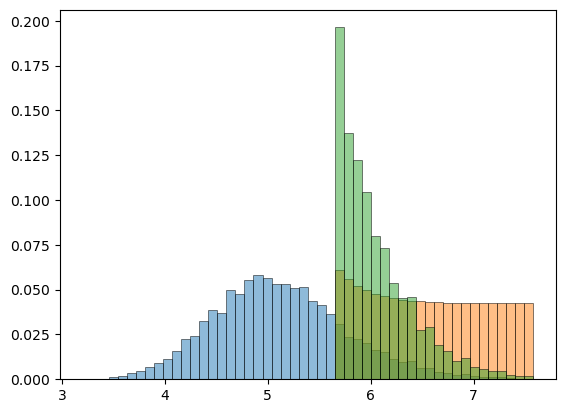

In [12]:


fig, ax = plt.subplots(1, 1)
# plt.title('Apriorní a aposteriorní prediktivní hustota')
# plt.plot(x, pmf_prior, 'o', color='royalblue', label='Apriorní prediktivní hustota')
# plt.plot(x, pmf_posterior, 'o', color='dimgray', label='Aposteriorní prediktivní hustota')
# ax.legend(loc='best')
# plt.xlabel('Čas [ms]')
# plt.ylabel('Hustota pozorování x')

# print(len(hist), len(bins_centers))

plt.bar(bins_centers, hist, width=bins_centers[1]-bins_centers[0], alpha=0.5, label='Aposteriorní hustota', edgecolor='black', linewidth=0.7)
plt.bar(bins_centers, likelihoods, width=bins_centers[1]-bins_centers[0], alpha=0.5, label='Aposteriorní hustota', edgecolor='black', linewidth=0.7)
plt.bar(bins_centers, posterior, width=bins_centers[1]-bins_centers[0], alpha=0.5, label='Aposteriorní hustota', edgecolor='black', linewidth=0.7)

# ax.hist(groups, bins=50, edgecolor='black', linewidth=0.7, density=True)
# ax.bar(bins_centers, likelihoods, bins=22, edgecolor='black', linewidth=0.7, density=True)
plt.show()
# ax.hist(d["time"], label=conf, bins=200)

In [13]:
# Seřazení aposteriorní hustoty vzestupně
# sorted_posterior = np.sort(posterior)
# sorted_posterior = posterior
# Výpočet kumulativní distribuční funkce (CDF)
cdf = np.cumsum(posterior)

# Hledání hodnot na krajích 95% intervalu spolehlivosti
lower_bound = bins_centers[np.where(cdf >= 0.025)[0][0]]
upper_bound = bins_centers[np.where(cdf >= 0.975)[0][0]]

print("95% Interval spolehlivosti pro parametr b:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

95% Interval spolehlivosti pro parametr b:
Lower Bound: 5.693712028182375
Upper Bound: 7.008910628347767


In [14]:
mean = sum(bins_centers * posterior)

median_index = np.where(cdf >= 0.5)[0][0]
median = bins_centers[median_index]

median

print(mean, median)

6.052771319832352 5.956751748215453


## Úloha 2 - Regrese

In [15]:
df_2 = pd.read_excel(open('Projekt-2_Data.xlsx', 'rb'), sheet_name='Úloha 2')
df_2 = df_2.rename(columns={'Ping [ms]' : 'Ping'})
df_2

,OSType,ActiveUsers,InteractingPct,ScrollingPct,Ping
0,iOS,4113,0.8283,0.1717,47
1,iOS,7549,0.3461,0.6539,46
2,Windows,8855,0.2178,0.7822,55
3,Android,8870,0.0794,0.9206,56
4,MacOS,9559,0.7282,0.2718,76
...,...,...,...,...,...
497,iOS,5315,0.1974,0.8026,28
498,MacOS,1392,0.2373,0.7627,24
499,iOS,6014,0.8112,0.1888,54
500,Android,5118,0.2345,0.7655,39


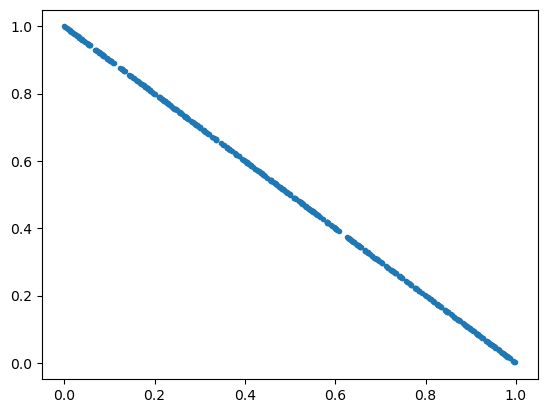

                            OLS Regression Results                            
Dep. Variable:                   Ping   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.24
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.91e-21
Time:                        21:40:45   Log-Likelihood:                -2019.0
No. Observations:                 502   AIC:                             4042.
Df Residuals:                     500   BIC:                             4050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         33.8517      0.403     84.

In [16]:
# Ukázání závislosti reziduí
fig = plt.figure()
plt.scatter(df_2.InteractingPct, df_2.ScrollingPct, marker='.')
plt.show()

model2DM1=smf.ols(formula='Ping~InteractingPct + ScrollingPct',data=df_2)
results2DM1=model2DM1.fit()
print(results2DM1.summary())


model2DM2=smf.ols(formula='Ping~InteractingPct',data=df_2)
results2DM2=model2DM2.fit()
print(results2DM2.summary())


model2DM3=smf.ols(formula='Ping~ScrollingPct',data=df_2)
results2DM3=model2DM3.fit()
print(results2DM3.summary())

In [17]:
# Definice plneho modelu
formula_definition = 'Ping ~ ActiveUsers + InteractingPct + C(OSType) + ' + \
    'ActiveUsers * InteractingPct + ' + \
    'ActiveUsers * C(OSType) + ' + \
    'InteractingPct * C(OSType) + ' + \
    '+ I(ActiveUsers**2) + I(InteractingPct**2)'
full_model = smf.ols(formula=formula_definition, data=df_2)
full_model_fit = full_model.fit()
full_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     187.9
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          5.18e-186
Time:                        21:40:45   Log-Likelihood:                -1598.4
No. Observations:                 502   AIC:                             3227.
Df Residuals:                     487   BIC:                             3290.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.3388      2.354     -0.144      0.886      -4.965       4.287
C(OSType)[T.MacOS]                      2.0017      2.260      0.886      0.376      -2.440       6.443
C(OSType)[T.Windows]                    7.8174      2.217      3.526      0.000       3.461      12.174
C(OSType)[T.iOS]                       -0.0483      2.265     -0.021      0.983      -4.499       4.403
ActiveUsers                             0.0100      0.001     17.571      0.000       0.009       0.011
ActiveUsers:C(OSType)[T.MacOS]          0.0014      0.000      4.536      0.000       0.001       0.002
ActiveUsers:C(OSType)[T.Windows]       -0.0008      0.000     -2.505      0.013      -0.001      -0.000
ActiveUsers:C(OSType)[T.iOS]           -0.0011      0.000     -3.369      0.001      -0.002      -0.000
InteractingPct                         37.6062      4.567      8.234      0.000      28.633      46.580
InteractingPct:C(OSType)[T.MacOS]      -0.3566      2.530     -0.141      0.888      -5.327       4.614
InteractingPct:C(OSType)[T.Windows]     0.4260      2.721      0.157      0.876      -4.919       5.771
InteractingPct:C(OSType)[T.iOS]         0.2678      2.691      0.100      0.921      -5.020       5.556
ActiveUsers:InteractingPct             -0.0031      0.000     -8.532      0.000      -0.004      -0.002
I(ActiveUsers ** 2)                  -4.17e-07    4.4e-08     -9.469      0.000   -5.03e-07    -3.3e-07
I(InteractingPct ** 2)                 -3.7258      3.492     -1.067      0.287     -10.587       3.135
==============================================================================
Omnibus:                      228.442   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3152.488
Skew:                           1.603   Prob(JB):                         0.00
Kurtosis:                      14.851   Cond. No.                     1.06e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept                             -3.388459e-01
C(OSType)[T.MacOS]                     2.001747e+00
C(OSType)[T.Windows]                   7.817378e+00
C(OSType)[T.iOS]                      -4.833230e-02
ActiveUsers                            1.002406e-02
ActiveUsers:C(OSType)[T.MacOS]         1.397350e-03
ActiveUsers:C(OSType)[T.Windows]      -7.618681e-04
ActiveUsers:C(OSType)[T.iOS]          -1.058353e-03
InteractingPct                         3.760617e+01
InteractingPct:C(OSType)[T.MacOS]     -3.565678e-01
InteractingPct:C(OSType)[T.Windows]    4.260464e-01
InteractingPct:C(OSType)[T.iOS]        2.678486e-01
ActiveUsers:InteractingPct            -3.086297e-03
I(ActiveUsers ** 2)                   -4.169698e-07
I(InteractingPct ** 2)                -3.725768e+00
dtype: float64


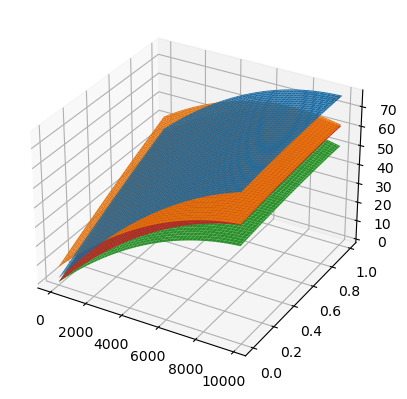

In [18]:
from matplotlib import cm

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')

# active_users_min = min(df_2.ActiveUsers)
active_users_max = max(df_2.ActiveUsers)

x = np.arange(0, 10000, 100)
y = np.arange(0.0, 1.0, 0.01)
X, Y = np.meshgrid(x, y)

print(full_model_fit.params)

zs_macos = full_model_fit.params['Intercept'] + \
    full_model_fit.params['C(OSType)[T.MacOS]'] + \
    full_model_fit.params['ActiveUsers'] * X + \
    full_model_fit.params['ActiveUsers:C(OSType)[T.MacOS]'] * X + \
    full_model_fit.params['InteractingPct'] * Y + \
    full_model_fit.params['InteractingPct:C(OSType)[T.MacOS]'] * Y + \
    full_model_fit.params['ActiveUsers:InteractingPct'] * X * Y + \
    full_model_fit.params['I(ActiveUsers ** 2)'] * X * X + \
    full_model_fit.params['I(InteractingPct ** 2)'] * Y * Y

zs_win = full_model_fit.params['Intercept'] + \
    full_model_fit.params['C(OSType)[T.Windows]'] + \
    full_model_fit.params['ActiveUsers'] * X + \
    full_model_fit.params['ActiveUsers:C(OSType)[T.Windows]'] * X + \
    full_model_fit.params['InteractingPct'] * Y + \
    full_model_fit.params['InteractingPct:C(OSType)[T.Windows]'] * Y + \
    full_model_fit.params['ActiveUsers:InteractingPct'] * X * Y + \
    full_model_fit.params['I(ActiveUsers ** 2)'] * X * X + \
    full_model_fit.params['I(InteractingPct ** 2)'] * Y * Y

zs_ios = full_model_fit.params['Intercept'] + \
    full_model_fit.params['C(OSType)[T.iOS]'] + \
    full_model_fit.params['ActiveUsers'] * X + \
    full_model_fit.params['ActiveUsers:C(OSType)[T.iOS]'] * X + \
    full_model_fit.params['InteractingPct'] * Y + \
    full_model_fit.params['InteractingPct:C(OSType)[T.iOS]'] * Y + \
    full_model_fit.params['ActiveUsers:InteractingPct'] * X * Y + \
    full_model_fit.params['I(ActiveUsers ** 2)'] * X * X + \
    full_model_fit.params['I(InteractingPct ** 2)'] * Y * Y

zs_android = full_model_fit.params['Intercept'] + \
    full_model_fit.params['ActiveUsers'] * X + \
    full_model_fit.params['InteractingPct'] * Y + \
    full_model_fit.params['ActiveUsers:InteractingPct'] * X * Y + \
    full_model_fit.params['I(ActiveUsers ** 2)'] * X * X + \
    full_model_fit.params['I(InteractingPct ** 2)'] * Y * Y

Z_macos = zs_macos.reshape(X.shape)
Z_win = zs_win.reshape(X.shape)
Z_ios = zs_ios.reshape(X.shape)
Z_android = zs_android.reshape(X.shape)

# Vykresleni puvodnich dat
# ax.scatter(df_2.ActiveUsers, df_2.InteractingPct, df_2.Ping, marker='.')

ax.plot_surface(X, Y, Z_macos)
ax.plot_surface(X, Y, Z_win)
ax.plot_surface(X, Y, Z_ios)
ax.plot_surface(X, Y, Z_android)

# ax.legend()
# ax.view_init(elev=20., azim=-35, roll=0)
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_zlim(0, 1)

#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
plt.show()

In [23]:
# Definice plneho modelu
formula_definition = 'Ping ~ ActiveUsers + InteractingPct + ' + \
    'ActiveUsers * InteractingPct + ' + \
    'ActiveUsers * C(OSType)'
final_model = smf.ols(formula=formula_definition, data=df_2)
final_model_fit = final_model.fit()
final_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     240.4
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          7.74e-174
Time:                        21:42:55   Log-Likelihood:                -1641.3
No. Observations:                 502   AIC:                             3303.
Df Residuals:                     492   BIC:                             3345.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           10.7513      1.894      5.677      0.000       7.030      14.472
C(OSType)[T.MacOS]                   0.0194      2.046      0.010      0.992      -4.001       4.040
C(OSType)[T.Windows]                 7.0519      2.029      3.476      0.001       3.065      11.039
C(OSType)[T.iOS]                    -1.9578      2.047     -0.956      0.339      -5.980       2.065
ActiveUsers                          0.0053      0.000     17.263      0.000       0.005       0.006
ActiveUsers:C(OSType)[T.MacOS]       0.0017      0.000      5.080      0.000       0.001       0.002
ActiveUsers:C(OSType)[T.Windows]    -0.0006      0.000     -1.954      0.051      -0.001    3.57e-06
ActiveUsers:C(OSType)[T.iOS]        -0.0008      0.000     -2.223      0.027      -0.001   -8.73e-05
InteractingPct                      35.0145      2.304     15.196      0.000      30.487      39.542
ActiveUsers:InteractingPct          -0.0032      0.000     -8.346      0.000      -0.004      -0.002
==============================================================================
Omnibus:                      118.152   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              609.004
Skew:                           0.922   Prob(JB):                    5.71e-133
Kurtosis:                       8.071   Cond. No.                     8.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept                           10.751348
C(OSType)[T.MacOS]                   0.019447
C(OSType)[T.Windows]                 7.051913
C(OSType)[T.iOS]                    -1.957757
ActiveUsers                          0.005349
ActiveUsers:C(OSType)[T.MacOS]       0.001684
ActiveUsers:C(OSType)[T.Windows]    -0.000640
ActiveUsers:C(OSType)[T.iOS]        -0.000751
InteractingPct                      35.014521
ActiveUsers:InteractingPct          -0.003234
dtype: float64


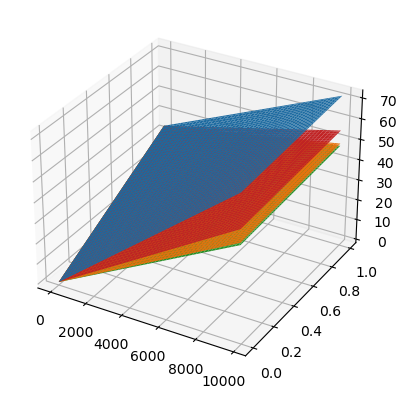

In [25]:
from matplotlib import cm

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')

# active_users_min = min(df_2.ActiveUsers)
active_users_max = max(df_2.ActiveUsers)

x = np.arange(0, 10000, 100)
y = np.arange(0.0, 1.0, 0.01)
X, Y = np.meshgrid(x, y)

print(final_model_fit.params)

zs_macos = full_model_fit.params['Intercept'] + \
    final_model_fit.params['ActiveUsers'] * X + \
    final_model_fit.params['ActiveUsers:C(OSType)[T.MacOS]'] * X + \
    final_model_fit.params['InteractingPct'] * Y + \
    final_model_fit.params['ActiveUsers:InteractingPct'] * X * Y

zs_win = full_model_fit.params['Intercept'] + \
    final_model_fit.params['ActiveUsers'] * X + \
    final_model_fit.params['ActiveUsers:C(OSType)[T.Windows]'] * X + \
    final_model_fit.params['InteractingPct'] * Y + \
    final_model_fit.params['ActiveUsers:InteractingPct'] * X * Y

zs_ios = full_model_fit.params['Intercept'] + \
    final_model_fit.params['ActiveUsers'] * X + \
    final_model_fit.params['ActiveUsers:C(OSType)[T.iOS]'] * X + \
    final_model_fit.params['InteractingPct'] * Y + \
    final_model_fit.params['ActiveUsers:InteractingPct'] * X * Y

zs_android = full_model_fit.params['Intercept'] + \
    final_model_fit.params['ActiveUsers'] * X + \
    final_model_fit.params['InteractingPct'] * Y + \
    final_model_fit.params['ActiveUsers:InteractingPct'] * X * Y

Z_macos = zs_macos.reshape(X.shape)
Z_win = zs_win.reshape(X.shape)
Z_ios = zs_ios.reshape(X.shape)
Z_android = zs_android.reshape(X.shape)

# Vykresleni puvodnich dat
# ax.scatter(df_2.ActiveUsers, df_2.InteractingPct, df_2.Ping, marker='.')

ax.plot_surface(X, Y, Z_macos)
ax.plot_surface(X, Y, Z_win)
ax.plot_surface(X, Y, Z_ios)
ax.plot_surface(X, Y, Z_android)

# ax.legend()
# ax.view_init(elev=20., azim=-35, roll=0)
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_zlim(0, 1)

#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
plt.show()